In [1]:
from pathlib import Path
import pandas as pd
import itertools
import seaborn as sns


files = Path('../data/functions').glob('*')

all_files=[]
for file in files:
    with open(file, 'r') as f:
        data = list(filter(None, f.read().splitlines()))
    all_files.append(data)

functions = pd.DataFrame({
    'functions' : all_files
})
functions

,functions
0,"[bootstrap.min.css, style.css, .min.js, index...."
1,"[bootstrap.min.css, jquery.min.js, bootstrap.m..."
2,"[style.css, google.maps.Map, document.getEleme..."
3,"[bootstrap.min.css, jquery.min.js, bootstrap.m..."
4,"[bootstrap.min.css, style.css, .min.js, index...."
...,...
629,"[style.css, index.js, document.getElementById,..."
630,"[bootstrap.min.css, style.css, x.Distance, .sl..."
631,"[style.css, jquery.min.js, bootstrap.min.css, ..."
632,"[bootstrap.min.css, style.css, index.js, .slim..."


In [2]:
import glob 
import pandas as pd

name = glob.glob("../data/functions/*")  # get all .csv files from the working dir
assert isinstance(name, list)
name = pd.DataFrame(name, columns = ['username'])
components = name.username.str[1:].str.split('-|_', expand = True)
name['Student'] = components[3]
name_drop = name.drop(['username'], axis=1)
name_drop

,Student
0,daapinzonch
1,mdecloedt
2,zhao744
3,mdecloedt
4,daapinzonch
...,...
629,DiegoAraque1207
630,davideperdomo
631,dieguischa
632,Acreed21


In [3]:
import glob 
import pandas as pd

name = glob.glob("../data/functions/*")  # get all .csv files from the working dir
assert isinstance(name, list)
name = pd.DataFrame(name, columns = ['username'])
components = name.username.str[1:].str.split('-|_', expand = True)
name['phase'] = components[5].str[-1:]
phase_drop = name.drop(['username'], axis=1)
phase_drop

,phase
0,4
1,3
2,3
3,4
4,3
...,...
629,2
630,5
631,3
632,3


In [4]:
df = pd.concat([functions, name_drop, phase_drop], axis = 1)
df

,functions,Student,phase
0,"[bootstrap.min.css, style.css, .min.js, index....",daapinzonch,4
1,"[bootstrap.min.css, jquery.min.js, bootstrap.m...",mdecloedt,3
2,"[style.css, google.maps.Map, document.getEleme...",zhao744,3
3,"[bootstrap.min.css, jquery.min.js, bootstrap.m...",mdecloedt,4
4,"[bootstrap.min.css, style.css, .min.js, index....",daapinzonch,3
...,...,...,...
629,"[style.css, index.js, document.getElementById,...",DiegoAraque1207,2
630,"[bootstrap.min.css, style.css, x.Distance, .sl...",davideperdomo,5
631,"[style.css, jquery.min.js, bootstrap.min.css, ...",dieguischa,3
632,"[bootstrap.min.css, style.css, index.js, .slim...",Acreed21,3


In [5]:
user = pd.read_csv("../data/user.csv")
user

,Student,group_type,group
0,mdecloedt,honors,0
1,Jordan-Loeser,honors,0
2,LukasMMarinovic,honors,0
3,whipplem123,honors,0
4,SionHu,honors,0
...,...,...,...
103,RafaelCruz15,unal,2
104,gimg1859,unal,2
105,jannMorenoJ,unal,2
106,dahrojasca,unal,2


In [6]:
df = df.merge(user, how='left', on='Student')
df

,functions,Student,phase,group_type,group
0,"[bootstrap.min.css, style.css, .min.js, index....",daapinzonch,4,unal,0.0
1,"[bootstrap.min.css, jquery.min.js, bootstrap.m...",mdecloedt,3,honors,0.0
2,"[style.css, google.maps.Map, document.getEleme...",zhao744,3,honors,0.0
3,"[bootstrap.min.css, jquery.min.js, bootstrap.m...",mdecloedt,4,honors,0.0
4,"[bootstrap.min.css, style.css, .min.js, index....",daapinzonch,3,unal,0.0
...,...,...,...,...,...
629,"[style.css, index.js, document.getElementById,...",DiegoAraque1207,2,unal,0.0
630,"[bootstrap.min.css, style.css, x.Distance, .sl...",davideperdomo,5,unal,1.0
631,"[style.css, jquery.min.js, bootstrap.min.css, ...",dieguischa,3,unal,0.0
632,"[bootstrap.min.css, style.css, index.js, .slim...",Acreed21,3,unal,0.0


## UNAL 0 Distance of Search

In [7]:
df_group0 = df[df['group'] == 0]

def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    if union_cardinality == 0:
        return 1
    return intersection_cardinality/float(union_cardinality)

wordings_users = list(zip(df_group0["functions"], df_group0["Student"], df_group0["phase"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "user1_phase": item[0][2], "user2_phase": item[1][2], "similarity": similarity}
    result.append(data)

df_group0_exp = pd.DataFrame(result)
df_group0_exp

,user1,user2,user1_phase,user2_phase,similarity
0,daapinzonch,mdecloedt,4,3,0.139535
1,daapinzonch,zhao744,4,3,0.117647
2,daapinzonch,mdecloedt,4,4,0.122449
3,daapinzonch,daapinzonch,4,3,0.774194
4,daapinzonch,zhao744,4,4,0.076190
...,...,...,...,...,...
33406,DiegoAraque1207,Acreed21,2,3,0.250000
33407,DiegoAraque1207,SergioLopez40,2,5,0.500000
33408,dieguischa,Acreed21,3,3,0.053435
33409,dieguischa,SergioLopez40,3,5,0.046512


In [8]:
df_group0_ind = df_group0_exp[df_group0_exp['user1'] == df_group0_exp['user2']]
df_group0_ind['user1_phase'] = df_group0_ind['user1_phase'].astype(str).astype(int)
df_group0_ind['user2_phase'] = df_group0_ind['user2_phase'].astype(str).astype(int)
df_group0_ind_s1 = df_group0_ind[(df_group0_ind['user1_phase'] == 1) & (df_group0_ind['user2_phase'] == 2)]

<ipython-input-8-50f3cd4ede7f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group0_ind['user1_phase'] = df_group0_ind['user1_phase'].astype(str).astype(int)
<ipython-input-8-50f3cd4ede7f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group0_ind['user2_phase'] = df_group0_ind['user2_phase'].astype(str).astype(int)
<ipython-input-8-50f3cd4ede7f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [9]:
df_group0_ind_s2 = df_group0_ind[(df_group0_ind['user1_phase'] == 2) & (df_group0_ind['user2_phase'] == 3)]
df_group0_ind_s3 = df_group0_ind[(df_group0_ind['user1_phase'] == 3) & (df_group0_ind['user2_phase'] == 4)]
df_group0_ind_s4 = df_group0_ind[(df_group0_ind['user1_phase'] == 4) & (df_group0_ind['user2_phase'] == 5)]
df_group0_ind_s1['stage'] = 1
df_group0_ind_s2['stage'] = 2
df_group0_ind_s3['stage'] = 3
df_group0_ind_s4['stage'] = 4

<ipython-input-9-c5b9c42afd99>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group0_ind_s1['stage'] = 1
<ipython-input-9-c5b9c42afd99>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group0_ind_s2['stage'] = 2
<ipython-input-9-c5b9c42afd99>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

In [10]:
ind_group0 = pd.concat([df_group0_ind_s1, df_group0_ind_s2, df_group0_ind_s3, df_group0_ind_s4], axis = 0)
ind_group0['exploration'] = 1 - ind_group0['similarity']

<AxesSubplot:xlabel='stage', ylabel='exploration'>

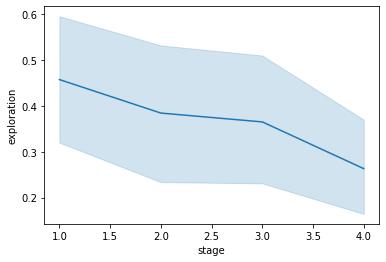

In [11]:
sns.lineplot(data = ind_group0, x='stage', y='exploration')

In [24]:
ind_group0['comparison_type'] = 'functions'
ind_group0['ssim_exp'] = ind_group0['similarity'] * 100

## UNAL 1 Distance of Search

In [13]:
df_group1 = df[df['group'] == 1]

def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    if union_cardinality == 0:
        return 1
    return intersection_cardinality/float(union_cardinality)

wordings_users = list(zip(df_group1["functions"], df_group1["Student"], df_group1["phase"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "user1_phase": item[0][2], "user2_phase": item[1][2], "similarity": similarity}
    result.append(data)

df_group1_exp = pd.DataFrame(result)
df_group1_exp

,user1,user2,user1_phase,user2_phase,similarity
0,facuellarg,Juankmilo97,5,1,0.307692
1,facuellarg,facuellarg,5,2,1.000000
2,facuellarg,DaniCastel,5,5,0.056604
3,facuellarg,DaniCastel,5,2,0.187500
4,facuellarg,facuellarg,5,3,0.176471
...,...,...,...,...,...
8380,sebcamacho1703,davideperdomo,3,2,0.192308
8381,sebcamacho1703,davideperdomo,3,5,0.085561
8382,xFortich,davideperdomo,2,2,0.104167
8383,xFortich,davideperdomo,2,5,0.053659


In [14]:
df_group1_ind = df_group1_exp[df_group1_exp['user1'] == df_group1_exp['user2']]
df_group1_ind['user1_phase'] = df_group1_ind['user1_phase'].astype(str).astype(int)
df_group1_ind['user2_phase'] = df_group1_ind['user2_phase'].astype(str).astype(int)
df_group1_ind_s1 = df_group1_ind[(df_group1_ind['user1_phase'] == 1) & (df_group1_ind['user2_phase'] == 2)]
df_group1_ind_s1 

<ipython-input-14-c08b3848a5de>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group1_ind['user1_phase'] = df_group1_ind['user1_phase'].astype(str).astype(int)
<ipython-input-14-c08b3848a5de>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group1_ind['user2_phase'] = df_group1_ind['user2_phase'].astype(str).astype(int)


,user1,user2,user1_phase,user2_phase,similarity
198,Juankmilo97,Juankmilo97,1,2,0.363636
830,gahormigag,gahormigag,1,2,1.000000
1070,nikolasto,nikolasto,1,2,1.000000
1306,evilcucaracha,evilcucaracha,1,2,0.375000
1560,JamerMejiaGarcia,JamerMejiaGarcia,1,2,1.000000
2233,ayperezc,ayperezc,1,2,0.000000
2450,DavidsMartinez,DavidsMartinez,1,2,1.000000
2579,sarguellesr,sarguellesr,1,2,1.000000
2685,garayf,garayf,1,2,0.098214
2795,jdsolanos,jdsolanos,1,2,1.000000


In [15]:
df_group1_ind_s2 = df_group1_ind[(df_group1_ind['user1_phase'] == 2) & (df_group1_ind['user2_phase'] == 3)]
df_group1_ind_s3 = df_group1_ind[(df_group1_ind['user1_phase'] == 3) & (df_group1_ind['user2_phase'] == 4)]
df_group1_ind_s4 = df_group1_ind[(df_group1_ind['user1_phase'] == 4) & (df_group1_ind['user2_phase'] == 5)]
df_group1_ind_s1['stage'] = 1
df_group1_ind_s2['stage'] = 2
df_group1_ind_s3['stage'] = 3
df_group1_ind_s4['stage'] = 4

<ipython-input-15-88a00698467d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group1_ind_s1['stage'] = 1
<ipython-input-15-88a00698467d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group1_ind_s2['stage'] = 2
<ipython-input-15-88a00698467d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

In [16]:
ind_group1 = pd.concat([df_group1_ind_s1, df_group1_ind_s2, df_group1_ind_s3, df_group1_ind_s4], axis = 0)
ind_group1['exploration'] = 1 - ind_group1['similarity']

<AxesSubplot:xlabel='stage', ylabel='exploration'>

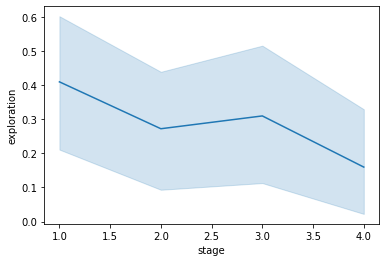

In [17]:
sns.lineplot(data = ind_group1, x='stage', y='exploration')

## UNAL 2 Distance of Search

In [18]:
df_group2 = df[df['group'] == 2]

def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    if union_cardinality == 0:
        return 1
    return intersection_cardinality/float(union_cardinality)

wordings_users = list(zip(df_group2["functions"], df_group2["Student"], df_group2["phase"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "user1_phase": item[0][2], "user2_phase": item[1][2], "similarity": similarity}
    result.append(data)

df_group2_exp = pd.DataFrame(result)
df_group2_exp

,user1,user2,user1_phase,user2_phase,similarity
0,dahrojasca,diefrodriguezcha,4,1,0.333333
1,dahrojasca,dahrojasca,4,3,0.750000
2,dahrojasca,gimg1859,4,5,1.000000
3,dahrojasca,gimg1859,4,2,1.000000
4,dahrojasca,adcorredorm,4,1,1.000000
...,...,...,...,...,...
8380,Jufcardenasmo,RafaelCruz15,5,4,0.048193
8381,Jufcardenasmo,Jufcardenasmo,5,2,0.197674
8382,jssanchezo,RafaelCruz15,1,4,1.000000
8383,jssanchezo,Jufcardenasmo,1,2,0.142857


In [19]:
df_group2_ind = df_group2_exp[df_group2_exp['user1'] == df_group2_exp['user2']]
df_group2_ind['user1_phase'] = df_group2_ind['user1_phase'].astype(str).astype(int)
df_group2_ind['user2_phase'] = df_group2_ind['user2_phase'].astype(str).astype(int)
df_group2_ind_s1 = df_group2_ind[(df_group2_ind['user1_phase'] == 1) & (df_group2_ind['user2_phase'] == 2)]
df_group2_ind_s1 

<ipython-input-19-3b614ffc9e51>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group2_ind['user1_phase'] = df_group2_ind['user1_phase'].astype(str).astype(int)
<ipython-input-19-3b614ffc9e51>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group2_ind['user2_phase'] = df_group2_ind['user2_phase'].astype(str).astype(int)


,user1,user2,user1_phase,user2_phase,similarity
181,diefrodriguezcha,diefrodriguezcha,1,2,0.318182
677,adcorredorm,adcorredorm,1,2,0.272727
802,DaveValencia,DaveValencia,1,2,1.000000
1178,pahigueraf,pahigueraf,1,2,0.484848
1768,jannMorenoJ,jannMorenoJ,1,2,0.360000
1881,trickyjuggler,trickyjuggler,1,2,0.121951
1998,casc3798,casc3798,1,2,0.636364
2337,csalfonsol,csalfonsol,1,2,0.400000
2461,jsalcinar,jsalcinar,1,2,0.178571
2575,jdgaitanf,jdgaitanf,1,2,0.187500


In [20]:
df_group2_ind_s2 = df_group2_ind[(df_group2_ind['user1_phase'] == 2) & (df_group2_ind['user2_phase'] == 3)]
df_group2_ind_s3 = df_group2_ind[(df_group2_ind['user1_phase'] == 3) & (df_group2_ind['user2_phase'] == 4)]
df_group2_ind_s4 = df_group2_ind[(df_group2_ind['user1_phase'] == 4) & (df_group2_ind['user2_phase'] == 5)]
df_group2_ind_s1['stage'] = 1
df_group2_ind_s2['stage'] = 2
df_group2_ind_s3['stage'] = 3
df_group2_ind_s4['stage'] = 4

<ipython-input-20-762951405b6a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group2_ind_s1['stage'] = 1
<ipython-input-20-762951405b6a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group2_ind_s2['stage'] = 2
<ipython-input-20-762951405b6a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

In [21]:
ind_group2 = pd.concat([df_group2_ind_s1, df_group2_ind_s2, df_group2_ind_s3, df_group2_ind_s4], axis = 0)
ind_group2['exploration'] = 1 - ind_group2['similarity']

<AxesSubplot:xlabel='stage', ylabel='exploration'>

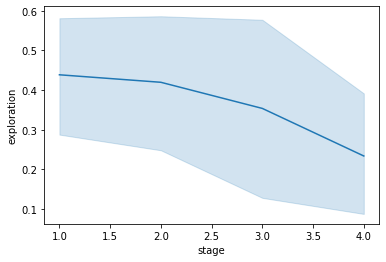

In [22]:
sns.lineplot(data = ind_group2, x='stage', y='exploration')

In [25]:
%store ind_group0

Stored 'ind_group0' (DataFrame)
